# CS PROJECT - queue model

insert your inputs in the cell below

In [1]:
# TIME TO RUN (IN MINUTES)
TTR = 400
###

# Employee COUNT
EC = 4

## imports

In [2]:
from scipy.stats import norm ,expon ,gamma
import numpy as np
from itertools import filterfalse
import matplotlib.pyplot as plt
import random
from collections import Counter
import seaborn as sns

## Employees </br>
we will comment sections for clarity

In [3]:
class Employees:
    # initial , containing three groups of emploees
    # Astate and ... saves our state history
    def __init__(self, EC):
        self.EC = EC
        self.A ,self.B ,self.C = [] ,[] ,[]
        self.Astates ,self.Bstates ,self.Cstates = {"TG" : 0 ,"TS" : 0}, {"SDK" : 0, "SDB" : 0}, {"TM" : 0, "SDK" : 0, "SDB" : 0}

        self.A.extend([{"type" : "TG" ,"c_id" : None} for _ in range(EC // 2)])
        self.A.extend([{"type" : "TS" ,"c_id" : None} for _ in range((EC // 2) + EC % 2)])

        self.B.extend([{"type" : "SDK" ,"c_id" : None} for _ in range(EC // 2)])
        self.B.extend([{"type" : "SDB" ,"c_id" : None} for _ in range((EC // 2) + EC % 2)])

        self.C.extend([{"type" : "SDK" ,"c_id" : None} for _ in range(EC // 3)])
        self.C.extend([{"type" : "SDB" ,"c_id" : None} for _ in range (EC // 3)])
        self.C.extend([{"type" : "TM" ,"c_id" : None} for _ in range ((EC // 3) + EC % 3)])

    # checks that what customers are being served
    def serving(self):
        res = []
        for val in self.A:
            if val["c_id"] == None : continue
            res.append(val["c_id"])

        for val in self.B:
            if val["c_id"] == None : continue
            res.append(val["c_id"])

        for val in self.C:
            if val["c_id"] == None : continue
            res.append(val["c_id"])

        return res

    # updates if some customer has departed
    # updates our state history
    def update(self ,finished):
        # update work
        for val in self.A:
            if val["c_id"] in finished : val["c_id"] = None

        for val in self.B:
            if val["c_id"] in finished : val["c_id"] = None

        for val in self.C:
            if val["c_id"] in finished : val["c_id"] = None

        # update states
        for i in range(len(self.A)):
            self.Astates[self.A[i]["type"]] += 1
        for i in range(len(self.B)):
            self.Bstates[self.B[i]["type"]] += 1
        for i in range(len(self.C)):
            self.Cstates[self.C[i]["type"]] += 1

    # ges idle employees
    def get_idle(self, mode):
        res = []
        for val in self.A:
            if val["type"] != mode : continue
            if val["c_id"] != None : continue
            res.append(val)

        for val in self.B:
            if val["type"] != mode : continue
            if val["c_id"] != None : continue
            res.append(val)

        for val in self.C:
            if val["type"] != mode : continue
            if val["c_id"] != None : continue
            res.append(val)
        return res
    # gets customer id of the people being served!
    def get_cid(self, mode):
        res = []
        for val in self.A:
            if val["type"] != mode : continue
            if val["c_id"] == None : continue
            res.append(val["c_id"])

        for val in self.B:
            if val["type"] != mode : continue
            if val["c_id"] == None : continue
            res.append(val["c_id"])

        for val in self.C:
            if val["type"] != mode : continue
            if val["c_id"] == None : continue
            res.append(val["c_id"])

        return res
    # gets the count of the people being served
    def get_serving_count(self):
        return len(self.get_cid("TG")) + len(self.get_cid("TS")) + len(self.get_cid("TM")) + len(self.get_cid("SDK")) + len(self.get_cid("SDB"))

    # transition of A according to the markov model
    def transition_A(self):
        randoms = np.random.rand(self.EC)
        for ind ,val in enumerate(self.A):
            if val["type"] == "TS":
                if randoms[ind] < 0.1 :
                    self.A[ind]["type"] = "TG"
                    self.A[ind]["c_id"] = None

            elif val["type"] == "TG":
                if randoms[ind] < 0.2 :
                    self.A[ind]["type"] = "TS"
                    self.A[ind]["c_id"] = None

    # transition of B according to the markov model
    def transition_B(self):
        randoms = np.random.rand(self.EC)
        for ind ,val in enumerate(self.B):
            if val["type"] == "SDB":
                if randoms[ind] < 0.05 :
                    self.B[ind]["type"] = "SDK"
                    self.B[ind]["c_id"] = None


            elif val["type"] == "SDK":
                if randoms[ind] < 0.15 :
                    self.B[ind]["type"] = "SDB"
                    self.B[ind]["c_id"] = None

    # transition of C according to the markov model
    def transition_C(self):
        randoms = np.random.rand(self.EC)
        for ind ,val in enumerate(self.C):
            if val["type"] == "SDK":
                if randoms[ind] < 0.1 :
                    self.C[ind]["type"] = "SDB"
                    self.C[ind]["c_id"] = None

                elif randoms[ind] < 0.2 :
                    self.C[ind]["type"] = "TM"
                    self.C[ind]["c_id"] = None

            elif val["type"] == "SDB":
                if randoms[ind] < 0.15 :
                    self.C[ind]["type"] = "SDK"
                    self.C[ind]["c_id"] = None

                elif randoms[ind] < 0.25 :
                    self.C[ind]["type"] = "TM"
                    self.C[ind]["c_id"] = None

            elif val["type"] == "SDK":
                if randoms[ind] < 0.05 :
                    self.C[ind]["type"] = "SDB"
                    self.C[ind]["c_id"] = None

                elif randoms[ind] < 0.1 :
                    self.C[ind]["type"] = "SDK"
                    self.C[ind]["c_id"] = None

## Customers

In [4]:
class Customers:
    # initail , containing our distribution!
    def __init__(self):
        self.customers = [] # {"c_id" : , "type" : , "tend" : , "initial_tend" :, "exit_time" : , "enter_time" : }
        self.all_customers_ever = []
        self.id = 0
        self.TG_arrival = norm(loc = 40, scale=6)
        self.TS_arrival = expon(scale = 1 / 0.5)
        self.TM_arrival = gamma(a = 2, scale = 1)
        self.SDK_arrival = expon(scale = 1 / 0.06)
        self.SDB_arrival = norm(loc = 15, scale = 6)

        self.TG_service = expon(scale = 30)
        self.TS_service = expon(scale =  25)
        self.TM_service = expon(scale =  10)
        self.SDK_service = expon(scale =  5)
        self.SDB_service = expon(scale =  10)

    # people of input get one turn of serving
    def served(self ,inp):
        for val in self.customers:
            if val["c_id"] in inp: val["tend"] -= 1

    # find the people that are finished and set there finish time
    # remove them from the current system
    def finished(self ,i):
        finished = []
        for val in self.customers:
            if val["tend"] <= 0 :
                finished.append(val["c_id"])
                self.all_customers_ever[val["c_id"]]["exit_time"] = i
        new_customers = []
        for val in self.customers:
            if val["tend"] > 0:
                new_customers.append(val)
        self.customers = new_customers
        return finished
    # add new people to system
    # add there start time
    def arrived(self, mode, i, TTR):
        temp_tend = self.get_service_time(mode)
        temp = {"c_id" : self.id, "type" : mode, "tend" : temp_tend, "initial_tend" : temp_tend, "exit_time": TTR, "enter_time": i}
        self.customers.append(temp)
        self.all_customers_ever.append(temp.copy())
        self.id += 1
    # get customers that are in queue of that type!
    def get_customers(self ,mode ,in_queue):
        res = []
        for val in self.customers:
            if val["type"] != mode : continue
            if val["c_id"] in in_queue : continue
            res.append(val)
        return res

    # get the Ai
    def get_arrival(self ,mode):
        if mode == "TG": return round(self.TG_arrival.rvs(size = 1)[0] + 1/2 )
        if mode == "TS": return round(self.TS_arrival.rvs(size = 1)[0] * 60)
        if mode == "TM": return round(self.TM_arrival.rvs(size = 1)[0] * 60)
        if mode == "SDK": return round(self.SDK_arrival.rvs(size = 1)[0]+ 1/2)
        if mode == "SDB": return round(self.SDB_arrival.rvs(size = 1)[0]+ 1/2)
    # get the Si
    def get_service_time(self ,mode):
        if mode == "TG": return round(self.TG_service.rvs(size = 1)[0] + 1/2)
        if mode == "TS": return round(self.TS_service.rvs(size = 1)[0] + 1/2)
        if mode == "TM": return round(self.TM_service.rvs(size = 1)[0] + 1/2)
        if mode == "SDK": return round(self.SDK_service.rvs(size = 1)[0]+ 1/2)
        if mode == "SDB": return round(self.SDB_service.rvs(size = 1)[0]+ 1/2)


## simulation

In [5]:
class Simulation:
    # initial , creating customer and employee class
    def __init__(self, TTR ,EC):
        self.TTR = TTR
        self.employees = Employees(EC)
        self.customers = Customers()
        self.A_change = 0
        self.B_change = 0
        self.C_change = 0
        self.L = []
        self.LQ = []
        self.W = []
        self.WQ = []
        self.A = []
        self.S = []

    # run simulation
    def simulation(self):
        self.init()
        for i in range(self.TTR):
            self.apply(i)
            self.map_()
            self.atend(i)
            self.update()
            self.calculate_LLQ()
        self.calculate_Ai()
        self.calculate_Si()
        self.calculate_WWQ()

    # calculate L and LQ
    def calculate_LLQ(self):
        self.L.append(len(self.customers.customers))
        self.LQ.append(len(self.customers.customers) - self.employees.get_serving_count())

    # give the starting values
    def init(self):
        self.TG_AT = self.customers.get_arrival("TG")
        self.TS_AT = self.customers.get_arrival("TS")
        self.TM_AT = self.customers.get_arrival("TM")
        self.SDK_AT = self.customers.get_arrival("SDK")
        self.SDB_AT = self.customers.get_arrival("SDB")

    def calculate_Ai(self):
        temp_arr = []
        for cus in self.customers.all_customers_ever:
            temp_arr.append(cus["enter_time"])
        temp_arr.sort()
        temp_arr2 = [0]*(len(temp_arr)-1)
        for i in range(1,len(temp_arr)):
            temp_arr2[i-1] = temp_arr[i]-temp_arr[i-1]
        self.A = temp_arr2

    def calculate_Si(self):
        temp_arr = []
        for i in range(len(self.customers.all_customers_ever)):
            temp_arr.append(self.customers.all_customers_ever[i]["initial_tend"])
        self.S = temp_arr

    def calculate_WWQ(self):
        temp_arr = []
        temp_arr_for_q = []
        for i in range(len(self.customers.all_customers_ever)):
            if self.customers.all_customers_ever[i]["exit_time"] >= self.TTR  : continue
            w = self.customers.all_customers_ever[i]["exit_time"] - self.customers.all_customers_ever[i]["enter_time"]
            temp_arr.append(w)
            temp_arr_for_q.append(w - self.customers.all_customers_ever[i]["initial_tend"])
        self.W = temp_arr
        self.WQ = temp_arr_for_q

    def map_TG(self):
        QTG = self.employees.get_cid("TG")
        CTG = sorted(self.customers.get_customers("TG" ,QTG), key=lambda x: x['tend'])
        ETG = self.employees.get_idle("TG")
        for i in range(min(len(ETG) ,len(CTG))):
            ETG[i]["c_id"] = CTG[i]["c_id"]

    def map_TS(self):
        QTS = self.employees.get_cid("TS")
        CTS = sorted(self.customers.get_customers("TS" ,QTS), key=lambda x: x['c_id'])
        ETS = self.employees.get_idle("TS")
        for i in range(min(len(ETS) ,len(CTS))):
            ETS[i]["c_id"] = CTS[i]["c_id"]

    def map_TM(self):
        QTM = self.employees.get_cid("TM")
        CTM = sorted(self.customers.get_customers("TM" ,QTM), key=lambda x: x['c_id'])
        ETM = self.employees.get_idle("TM")
        for i in range(min(len(ETM) ,len(CTM))):
            ETM[i]["c_id"] = CTM[i]["c_id"]

    def map_SDK(self):
        QSDK = self.employees.get_cid("SDK")
        CSDK = sorted(self.customers.get_customers("SDK" ,QSDK), key=lambda x: x['tend'])
        ESDK = self.employees.get_idle("SDK")
        for i in range(min(len(ESDK) ,len(CSDK))):
            ESDK[i]["c_id"] = CSDK[i]["c_id"]

    def map_SDB(self):
        QSDB = self.employees.get_cid("SDB")
        CSDB = random.sample(self.customers.get_customers("SDB" ,QSDB), len(self.customers.get_customers("SDB" ,QSDB)))
        ESDB = self.employees.get_idle("SDB")
        for i in range(min(len(ESDB) ,len(CSDB))):
            ESDB[i]["c_id"] = CSDB[i]["c_id"]

    # map customers to the idle servers
    def map_(self):
        # queue of TG
        self.map_TG()
        # queue of TS
        self.map_TS()
        # queue of TM
        self.map_TM()
        # queue of SDK
        self.map_SDK()
        # queue of SDB
        self.map_SDB()

    # give a turn of serving and check for results
    def atend(self,i):
        serving = self.employees.serving()
        self.customers.served(serving)
        finished = self.customers.finished(i)
        self.employees.update(finished)

    def apply_transitions(self):
        if self.A_change == 5:
            self.employees.transition_A()
            self.A_change = 0

        if self.B_change == 7:
            self.employees.transition_B()
            self.B_change = 0

        if self.C_change == 10:
            self.employees.transition_C()
            self.C_change = 0

    def apply_arrivals(self, i):
        if self.TG_AT == 0 :
            self.customers.arrived("TG",i,TTR)
            self.TG_AT = self.customers.get_arrival("TG")

        if self.TS_AT == 0 :
            self.customers.arrived("TS",i,TTR)
            self.TS_AT = self.customers.get_arrival("TS")

        if self.TM_AT == 0 :
            self.customers.arrived("TM",i,TTR)
            self.TM_AT = self.customers.get_arrival("TM")

        if self.SDK_AT == 0 :
            self.customers.arrived("SDK",i,TTR)
            self.SDK_AT = self.customers.get_arrival("SDK")

        if self.SDB_AT == 0 :
            self.customers.arrived("SDB",i,TTR)
            self.SDB_AT = self.customers.get_arrival("SDB")

    # apply the counter type actions
    def apply(self,i):
        self.apply_transitions()
        self.apply_arrivals(i)

    # update counters
    def update(self):
        self.A_change += 1
        self.B_change += 1
        self.C_change += 1

        self.TG_AT -= 1
        self.TS_AT -= 1
        self.TM_AT -= 1
        self.SDK_AT -= 1
        self.SDB_AT -= 1



In [6]:
sim = Simulation(TTR ,EC)
sim.simulation()

### mean values

In [7]:
print("L mean  : " ,np.mean(sim.L))
print("LQ mean  : " ,np.mean(sim.LQ))
print("W mean  : " ,np.mean(sim.W))
print("WQ mean  : " ,np.mean(sim.WQ))

L mean  :  1.42
LQ mean  :  0.0
W mean  :  9.26530612244898
WQ mean  :  -1.0


### Ai

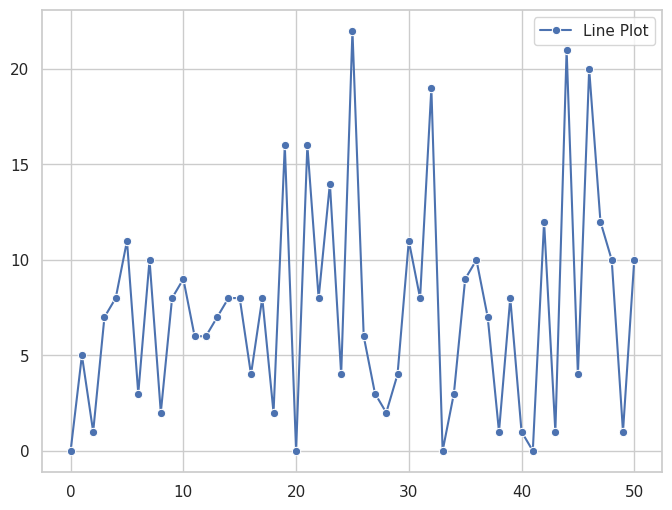

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(sim.A , marker='o', color='b', label='Line Plot')
plt.show()

# as we see , these values cant be predicted easily and its hard to calculate them without simulation
# we sorted our starting times and then proceed to calculate A(i) = T(i) - T(i-1)

### Si

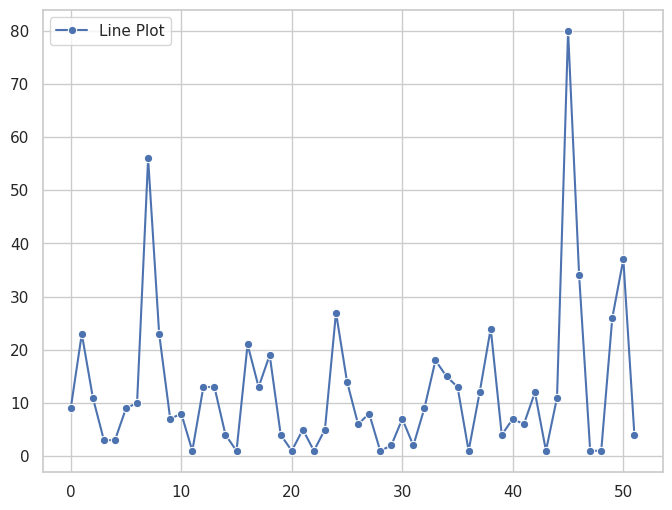

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(sim.S , marker='o', color='b', label='Line Plot')
plt.show()
# these values are given from the distributions ,nothing special

### L and LQ

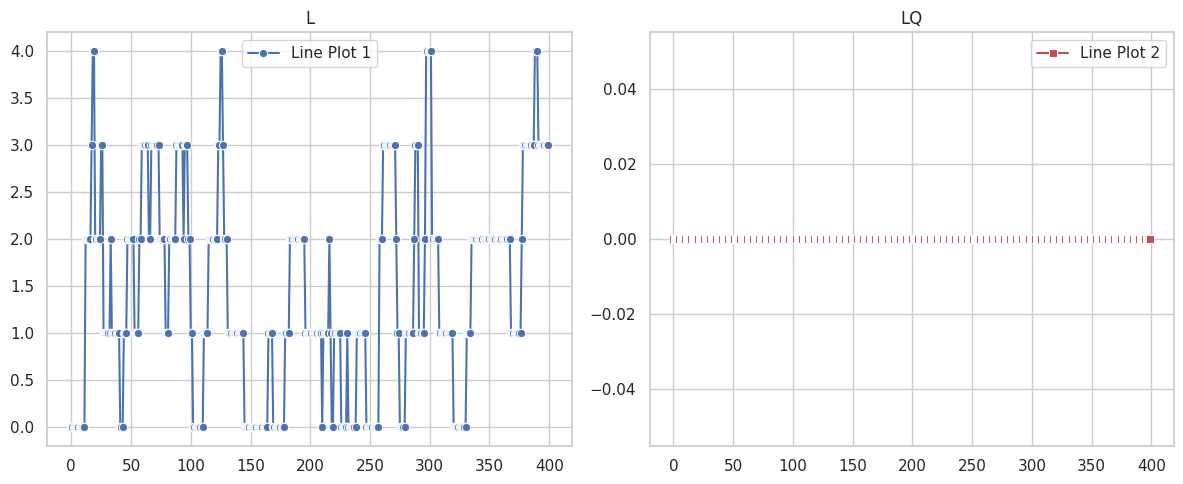

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(sim.L , marker='o', color='b', label='Line Plot 1', ax=axes[0])
axes[0].set_title('L')
sns.lineplot(sim.LQ , marker='s', color='r', label='Line Plot 2', ax=axes[1])
axes[1].set_title('LQ')
plt.tight_layout()
plt.show()

# we can see that LQ is always less than L
# only time that these values are equal , its the idle time!
# LQ can be said as L - number of people being served  (more or less)

### W and WQ

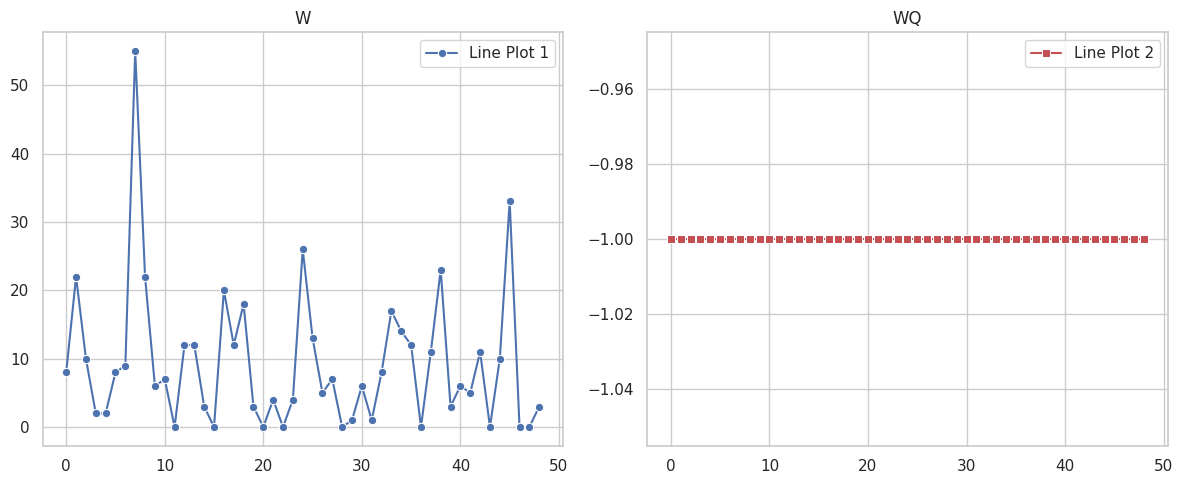

In [11]:
# these are just like L and LQ
# WQ can be said as W - service time (more or less)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(sim.W , marker='o', color='b', label='Line Plot 1', ax=axes[0])
axes[0].set_title('W')
sns.lineplot(sim.WQ , marker='s', color='r', label='Line Plot 2', ax=axes[1])
axes[1].set_title('WQ')
plt.tight_layout()
plt.show()


### pie charts

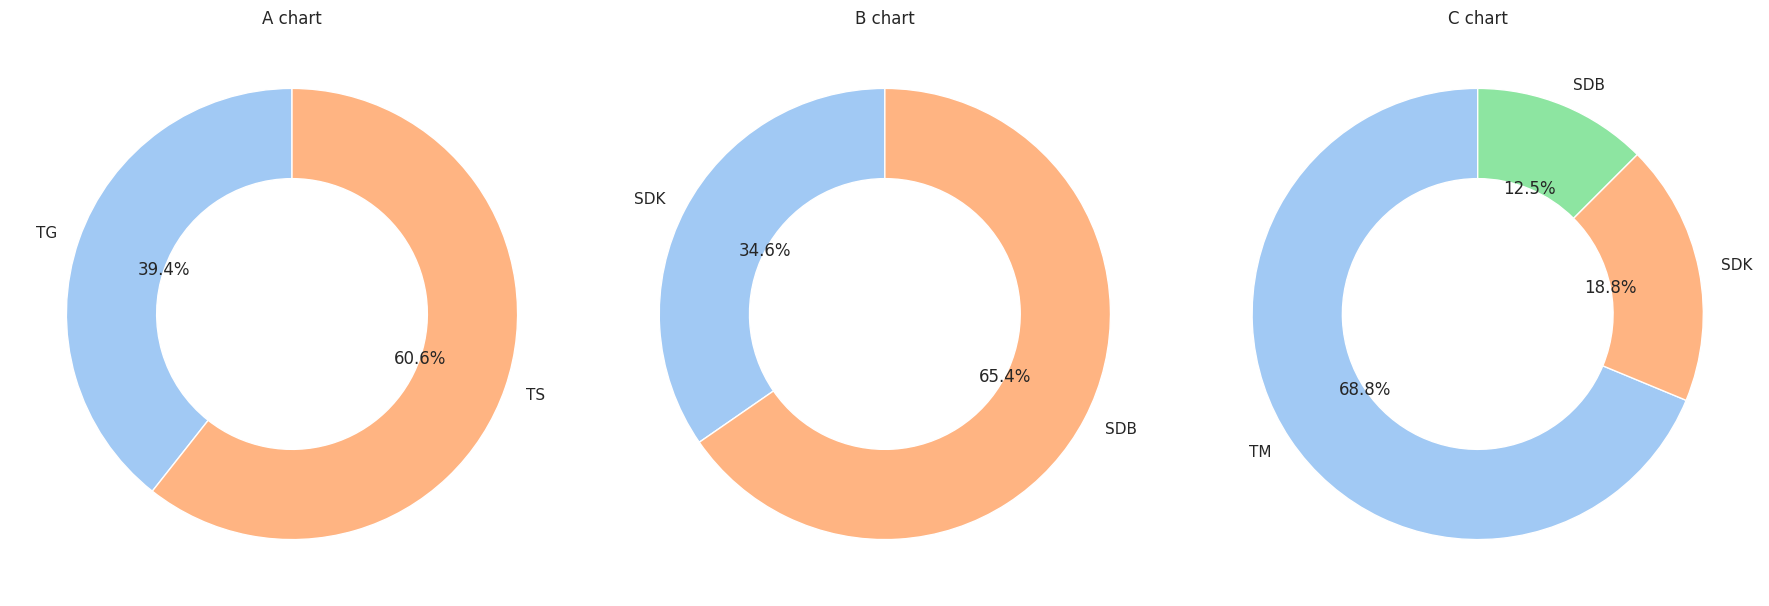

In [12]:
# we just calculated the amount these states appeared
# we can see that these values match markow model!

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

def create_pie_chart(data_dict, ax, title):
    labels = list(data_dict.keys())
    values = list(data_dict.values())
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
    ax.set_title(title)

create_pie_chart(sim.employees.Astates, axes[0], 'A chart')
create_pie_chart(sim.employees.Bstates, axes[1], 'B chart')
create_pie_chart(sim.employees.Cstates, axes[2], 'C chart')

plt.tight_layout()
plt.show()